<h1>Tarea 2</h1>
<h2>Fidel Alejandro Navarro Salazar</h2>

<h3>Objetivos:</h3>
Utilizar  un  generador  de númerosaleatorios  para  obtener (a)  secuencias  de númerospara  señalar  sus característicasestadísticasy (b) una configuracióninicial de un sistema en 2D y otro en 3D, dados los parámetrossuficientes para su implementación.

<h3>Actividad 1</h3>
Elaborar  un  programapara  generar  números  aleatorios de  acuerdo  con  elsiguiente algoritmo:

$x_n=(5x_{n-1}+1)mod(16)$

El programa deberá incluir:

(a) La lectura por pantalla de la semilla y la salida como una tabla de dos columnas ($n$ y $x_n$), para $n=1,2,...,100$. Hacerlo para tres semillas diferentes.

(b) Reposrta en cada caso de $(i)$ las características de la secuencia de números aleatorios.

In [1]:
#Importamos las librarias a utilizar.
import pandas as pd
import numpy as np
from numba import njit

In [2]:
#Definimos una función que nos genere número aleatorios.
#njit es una decoración para nuestra función permite correr el código en LLVM
@njit
def rand(Xo, m, a, c, n):
    x = np.zeros(n)
    x[0] = (a*Xo+c)%m
    i = 1
    while i<n:
        x[i] = (a * x[i-1] + c)%m
        i = i+1
    return x

Llamaremos la funcion para tres semillas diferentes.

Las semillas serán $i=2, 5, 7$.

Cada semilla sera evaluada y posteriormente visualizaremos los valores obtenidos en una tabla.

In [3]:
s_2 = pd.DataFrame({"x" : rand(2,16,5,1,100)})
#Mostramos los primeros 20 números
s_2.head(20)

,x
0,11.0
1,8.0
2,9.0
3,14.0
4,7.0
5,4.0
6,5.0
7,10.0
8,3.0
9,0.0


Para la semilla $i=2$ tenemos que después de 17 números la secuencia se repite.

In [4]:
s_5 = pd.DataFrame({"x" : rand(5,16,5,1,100)})
#Mostramos los primeros 20 números
s_5.head(20)

,x
0,10.0
1,3.0
2,0.0
3,1.0
4,6.0
5,15.0
6,12.0
7,13.0
8,2.0
9,11.0


Similarmente, para la semilla $i=5$ tenemos que después de 17 números la secuencia se repite.

In [5]:
s_7 = pd.DataFrame({"x" : rand(7,16,5,1,100)})
#Mostramos los primeros 20 números
s_7.head(20)

,x
0,4.0
1,5.0
2,10.0
3,3.0
4,0.0
5,1.0
6,6.0
7,15.0
8,12.0
9,13.0


Por último, para la semilla $a=5$ 
tenemos que después de 17 números la secuencia se repite.

<h3>Actividad 2</h3>
Elaborar un programa para generar números aleatorios con el generador que incluye su compilador.

El programa deberá incluir:

(a) La lectura de la semilla y la salida por pantalla de dos columnas ($n$ y $x_n$), para $n=1,2,...,100$.

(b) La lectura por pantalla de dos semillas y la salida en un archivo de dos columnas ($x_n$, $y_n$), donde $x_n$ y $y_n$ son números aleatorios. Hacerlo para 100, 1000 y 10000 parejas de números aleatorios.

(c) Graficar el resultado obtenido para los tres casos de (b). 

In [6]:
#Importamos la biblioeca a utilizar
import random as rd

In [7]:
#Creamos una función que nos genere una lista de "n" números a aleatorios con una semilla "s" generados mediante la biblioteca "random" de Python.
@njit
def seed(s,n):
    x = np.zeros(n)
    for i in range(n):
        x[i] = rd.random()
    return x

(a) Generamos una tabla con n=100 números aleatorios y una semilla de s=5

In [8]:
s_a = pd.DataFrame({"x" : seed(5,100)})
s_a

,x
0,0.628952
1,0.457824
2,0.655000
3,0.571979
4,0.848858
...,...
95,0.527190
96,0.676110
97,0.683597
98,0.862321


(b) Gemeraremos tres tablas y archivos con dos columnas de números aleatorios $x_n$ y $y_n$ para $n=100, 1000, 10000$

In [9]:
#Establecemos el valor de la semilla para x_n y y_n.
sx=7
sy=10

In [10]:
#Calculamos las respectivas listas de valores aleatorios para x_n y y_n.
x_100 = pd.DataFrame({"x" : seed(sx,100)})
x_1000 = pd.DataFrame({"x" : seed(sx,1000)})
x_10000 = pd.DataFrame({"x" : seed(sx,10000)})

y_100 = pd.DataFrame({"y" : seed(sy,100)})
y_1000 = pd.DataFrame({"y" : seed(sy,1000)})
y_10000 = pd.DataFrame({"y" : seed(sy,10000)})

#Creamos una sola tabla para cada x_n y y_n
#Combinamos ambas tablas
xy_100 = pd.concat([x_100, y_100], axis=1)
xy_1000 = pd.concat([x_1000, y_1000], axis=1)
xy_10000 = pd.concat([x_10000, y_10000], axis=1)

#Guardamos los datos en 3 archivos .csv
xy_100.to_csv("xy_100.csv",index=False)
xy_1000.to_csv("xy_1000.csv",index=False)
xy_10000.to_csv("xy_10000.csv",index=False)

(c) Graficamos los números aleatorios guardados en los archivos csv

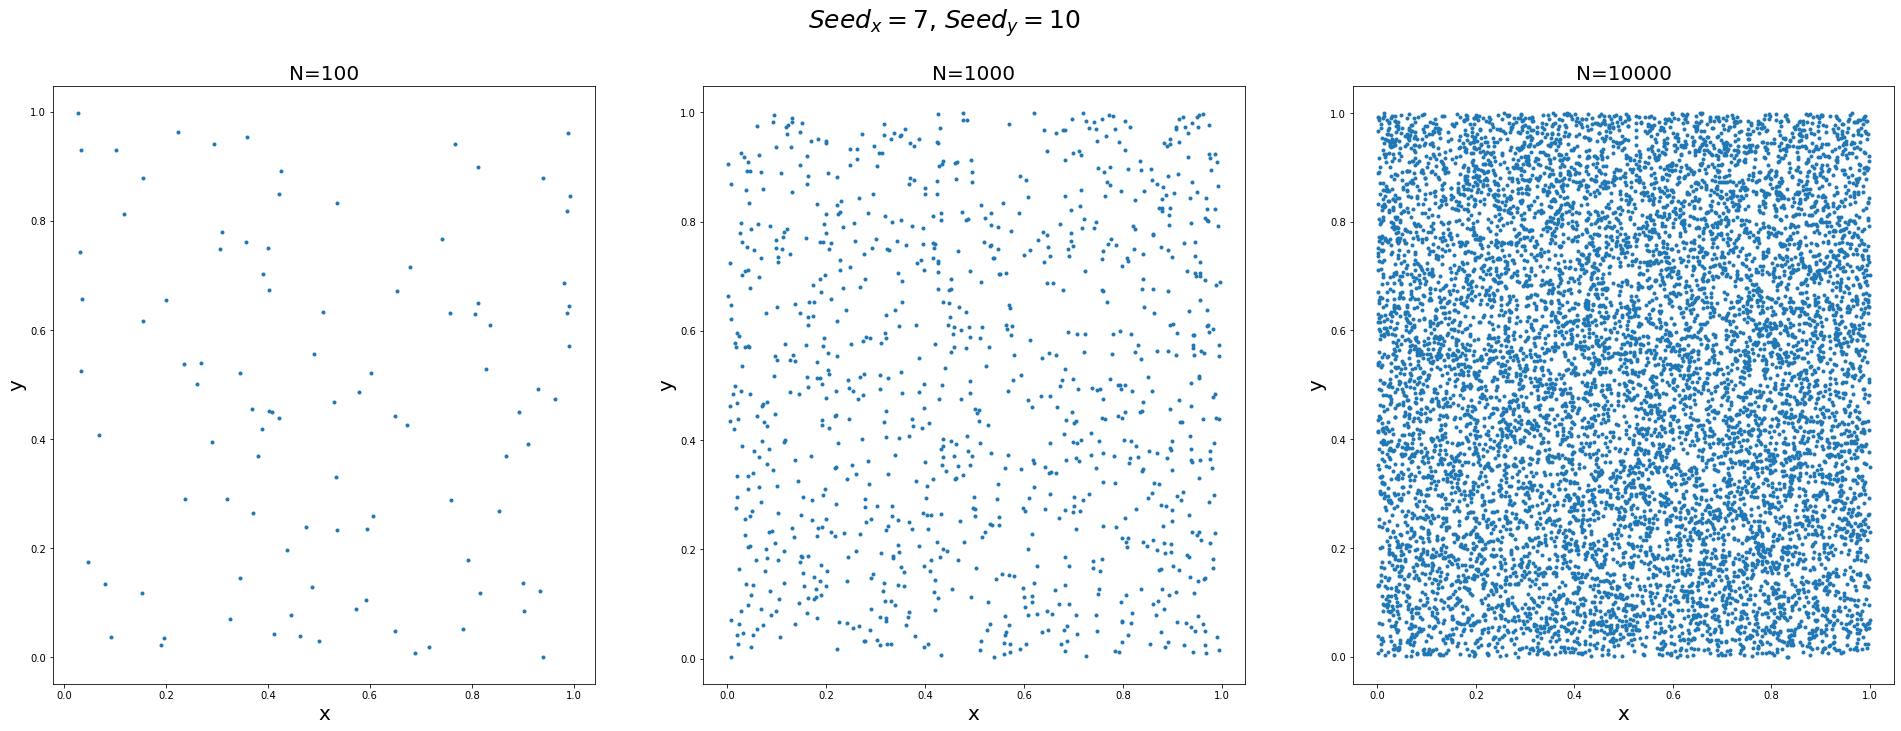

In [12]:
#Importamos las bibliotecas a utiilizar
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Se graficaran las funciones obtenidas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(33, 11)

fig.suptitle("$Seed_x=7$, $Seed_y =10$", size=25)

ax1.plot(xy_100["x"], xy_100["y"], ".")
ax1.set_title("N=100", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)

ax2.plot(xy_1000["x"], xy_1000["y"], ".")
ax2.set_title("N=1000", size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)

ax3.plot(xy_10000["x"], xy_10000["y"], ".")
ax3.set_title("N=10000", size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)



plt.show()

<h3>Actividad 3</h3>
Configuración inicial aleatoria bidimensional.

Implementar un código para construir una configuración inicial aleatoria bidimensional sin translapes. Ejecutar su programa para obtener configuraciones iniciales para los casos siguientes.

(a) Concentración reducida fija en $n*=0.4$ y $N=100,500, 1000$ partículas.

(b) Número de partículas fijo en $N=500$ y $n*=0.2,0.6,0.8$.

En cada caso:

(i) Incluir códifo de la instrucción que lleve a mostrar la longitud de la celda de simulación

(ii) Mostrar gráficamente la distribución de partículas obtenidas donde se aprecie con claridad la longotud de la celda correspondiente.

Debido a que la celda es bidimensional tenemos que su longitud reducida $L*$ esta dada por:

$L*=\sqrt{\frac{N}{n*}}$

Por otro lado, su fracción de área $A*$ esta dado por:

$A*=\frac{Na}{A}=\frac{N}{A}(\frac{\pi d^2}{4})=n(\frac{\pi d^2}{4})=\frac{\pi n*}{4}$

donde $d$ es el diámetro de la partícula.

In [13]:
#La longitud reducida esta dado por la función
#L_bin(concentración reducida, número de partículas)
@njit
def L_bi(n,N,dim):
    if dim==2:
        return (np.sqrt(N/n))
    else:
        return ((N/n)**(1./3))
    
#El radio de la partícula esta dado por la función
@njit
def rad(n,dim):
    if dim==2:
        return (np.sqrt(n/4))
    else:
        return ( (  n/8 )**(1./3) )

#Creamos una función que nos diga si dos circulos se intersectan 
@njit
def intersec(x0, y0, z0, x1, y1, z1, r):
    d = np.sqrt((x1-x0)**2 + (y1-y0)**2 + (z1-z0)**2)
    if d <= 2*r:
        return 0
    else:
        return 1

In [14]:
#Creamos una función que nos de las posiciones de nuestras partículas
#Esta función es general para 2 o 3 dimensiones
@njit
def caja(s,n,N,dim):
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    rd.seed(s)
    
    #Llamamos a la funciones declaradas para calcular la longitud, Área/Volumen y Radio
    L = L_bi(n,N,dim)
    r = rad(n,dim)
    
    #Calculamos el valor de la primera partícula de forma directa ya que no hay otra posición con cual compararla
    x[0] = rd.uniform(0,L)
    y[0] = rd.uniform(0,L)
    #Incorporamos un condicional para el caso de 2 o 3 dimensiones
    if dim==3:
        z[0] = rd.uniform(0,L)
        
    i=1
    #Calculamos la posición de las demas partículas
    while i < N:
        k = 0
        x[i] = rd.uniform(0,L)
        y[i] = rd.uniform(0,L)
        if dim==3:
            z[i] = rd.uniform(0,L)
            
        #En este ciclo comparamos la posición prueba de nuestra partícula con las posiciones de las partículas anteriores
        for j in range(i):
            #Llamamos a la función que nos calcula la intersección entre dos partículas, si hay intersección nos regresa un cero
            #Cada IF revisa si existe una intersección con la partícula y las vecinas, incluyendo a las que se encuentran en las celdas imagen
            if ( intersec( x[i], y[i], z[i], x[j], y[j], z[j],r )==0):
                #Esta variable nos permite llevar la cuenta de cuantas veces se a repetido la posición de la partícula
                k = k+1
                #Esta instrucción nos permite salir del if si se cumple la condición de que dos partículas se intersectan
                break
            elif (intersec(x[i], y[i], z[i], x[j]+L, y[j], z[j], r)==0):
                k=k+1
                break
            elif (intersec(x[i], y[i], z[i], x[j]-L, y[j], z[j], r)==0):
                k=k+1
                break
            elif (intersec(x[i], y[i], z[i], x[j], y[j]+L, z[j], r)==0):
                k=k+1
                break
            elif (intersec(x[i], y[i], z[i], x[j], y[j]-L, z[j], r)==0):
                k=k+1
                break
            elif (intersec(x[i], y[i], z[i], x[j]+L, y[j]+L, z[j], r)==0):
                k=k+1
                break
            elif (intersec(x[i], y[i], z[i], x[j]-L, y[j]+L, z[j], r)==0):
                k=k+1
                break
            elif (intersec(x[i], y[i], z[i], x[j]+L, y[j]-L, z[j], r)==0):
                k=k+1
                break
            elif (intersec(x[i], y[i], z[i], x[j]-L, y[j]-L, z[j], r)==0):
                k=k+1
                break
                
            #Para 3 dimensiones
            if dim==3:
                if (intersec(x[i], y[i], z[i], x[j], y[j], z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]+L, y[j], z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]-L, y[j], z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j], y[j]+L, z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j], y[j]-L, z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]+L, y[j]+L, z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]-L, y[j]+L, z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]+L, y[j]-L, z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]-L, y[j]-L, z[j]+L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j], y[j], z[j]-L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]+L, y[j], z[j]-L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]-L, y[j], z[j]-L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j], y[j]+L, z[j]-L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j], y[j]-L, z[j]-L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]+L, y[j]+L, z[j]-L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]-L, y[j]+L, z[j]-L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]+L, y[j]-L, z[j]-L, r)==0):
                    k=k+1
                    break
                elif (intersec(x[i], y[i], z[i], x[j]-L, y[j]-L, z[j]-L, r)==0):
                    k=k+1
                    break
                
            #Si se repitio la posición de la partícula cambiamos nuestra semilla y volvemos a calcular la posición de la partícula
        if k != 0:                    
            s=s+0.1
            rd.seed(s)
        #Si el valor no se repitio guardamos el valor prueba en nuestra lista
        elif k==0:
            #Aumentamos el valor de este contador para pasar a la siguiente partícula
            i=i+1
    if dim==2:
        v = np.column_stack((x,y))
        return v
    else:
        v = np.column_stack((x,y,z))
        return v

a) Gráficos para concentración reducida fija en $n*=0.4$ y $N=100, 500, 1000$.

In [15]:
#Valores para n*=0.4
#con N=100
n100 = pd.DataFrame( caja(3,0.4,100,2) , columns={"x", "y"})
#con N=500
n500 = pd.DataFrame( caja(3,0.4,500,2) , columns={"x", "y"})
#con N=1000
n1000 = pd.DataFrame( caja(3,0.4,1000,2) , columns={"x", "y"})

In [16]:
#Definimos una función que nos genere circulos
def circl(v,n,N,dim,i):
    if dim==2:
        circle = plt.Circle( (v["x"][i], v["y"][i] ), rad(n,2)) #fill=Flase
    elif dim==3:
        circle = plt.Circle( (v["x"][i], v["y"][i] ), rad(n,3))
    return circle

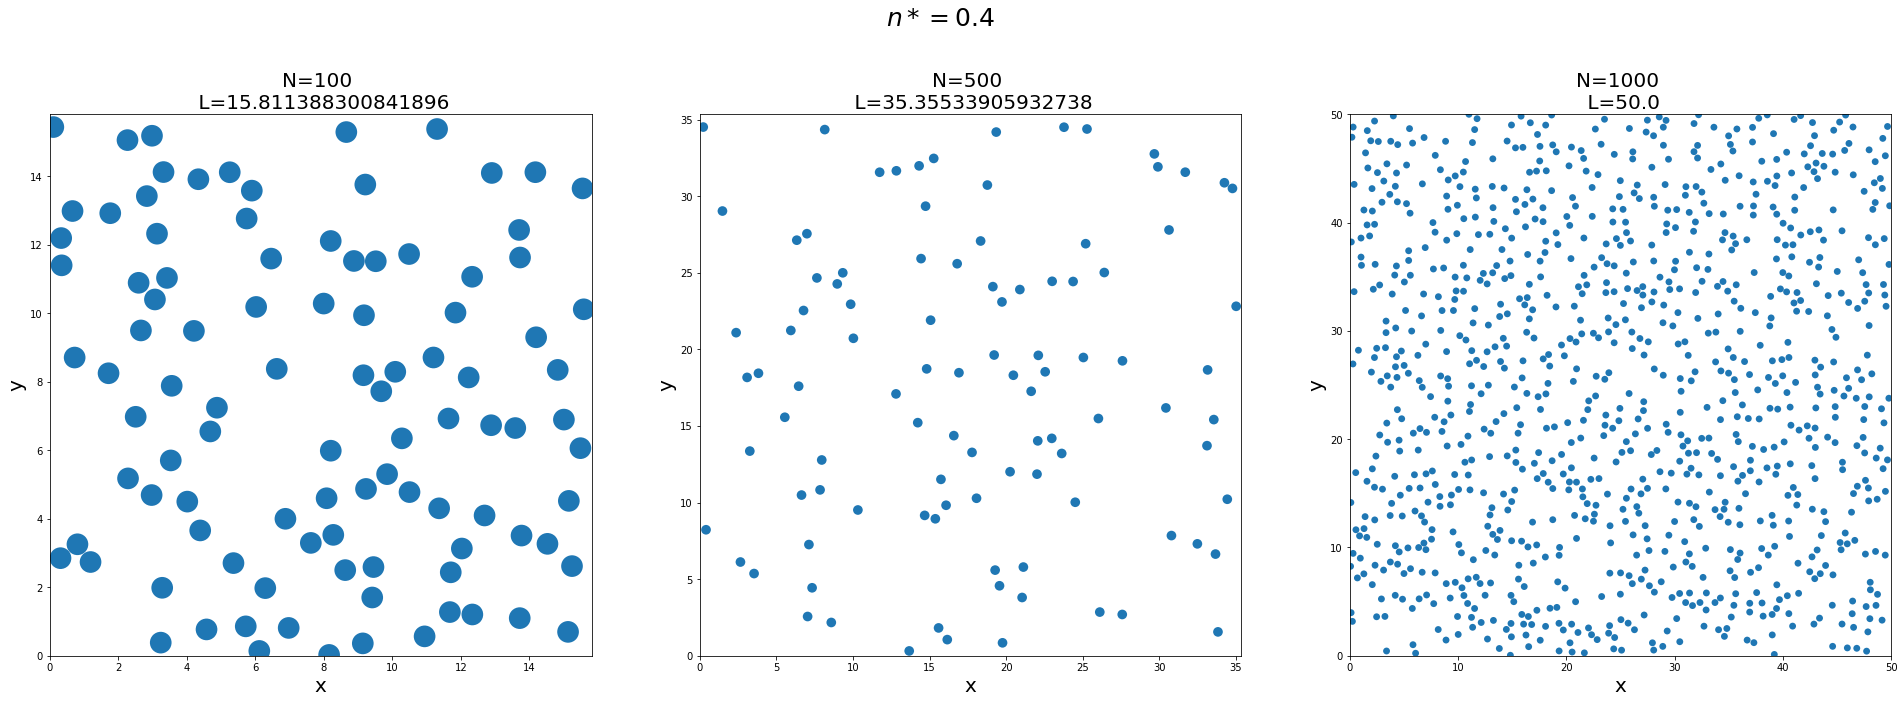

In [17]:
#Se graficaran las funciones obtenidas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(33, 11)

fig.suptitle("$n*=0.4$", size=25)


ax1.set_aspect( 1 )
for i in range(100):
    ax1.add_artist( circl(n100,0.4,100,2,i) ) 

ax1.set_title("N=100 \n L="+str(L_bi(0.4,100,2)), size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_xlim(0,L_bi(0.4,100,2))
ax1.set_ylim(0,L_bi(0.4,100,2))

ax2.set_aspect( 1 )
for i in range(100):
    ax2.add_artist( circl(n500,0.4,500,2,i) ) 
    
ax2.set_title("N=500 \n L="+str(L_bi(0.4,500,2)), size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_xlim(0,L_bi(0.4,500,2))
ax2.set_ylim(0,L_bi(0.4,500,2))

ax3.set_aspect( 1 )
for i in range(1000):
    ax3.add_artist( circl(n1000,0.4,1000,2,i) ) 
    
ax3.set_title("N=1000 \n L="+str(L_bi(0.4,1000,2)), size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_xlim(0,L_bi(0.4,1000,2))
ax3.set_ylim(0,L_bi(0.4,1000,2))



plt.show()

b) Gráficas para número de partículas fijo en $N=500$ y $n*= 0.2,0.6,0.8$.

In [18]:
#Valores para N=500
#con n*=0.2
n02 = pd.DataFrame( caja(3,0.2,500,2) , columns={"x", "y"})
#con n*=0.6
n06 = pd.DataFrame( caja(3,0.6,500,2) , columns={"x", "y"})
#con n*=0.8
n08 = pd.DataFrame( caja(3,0.8,500,2) , columns={"x", "y"})

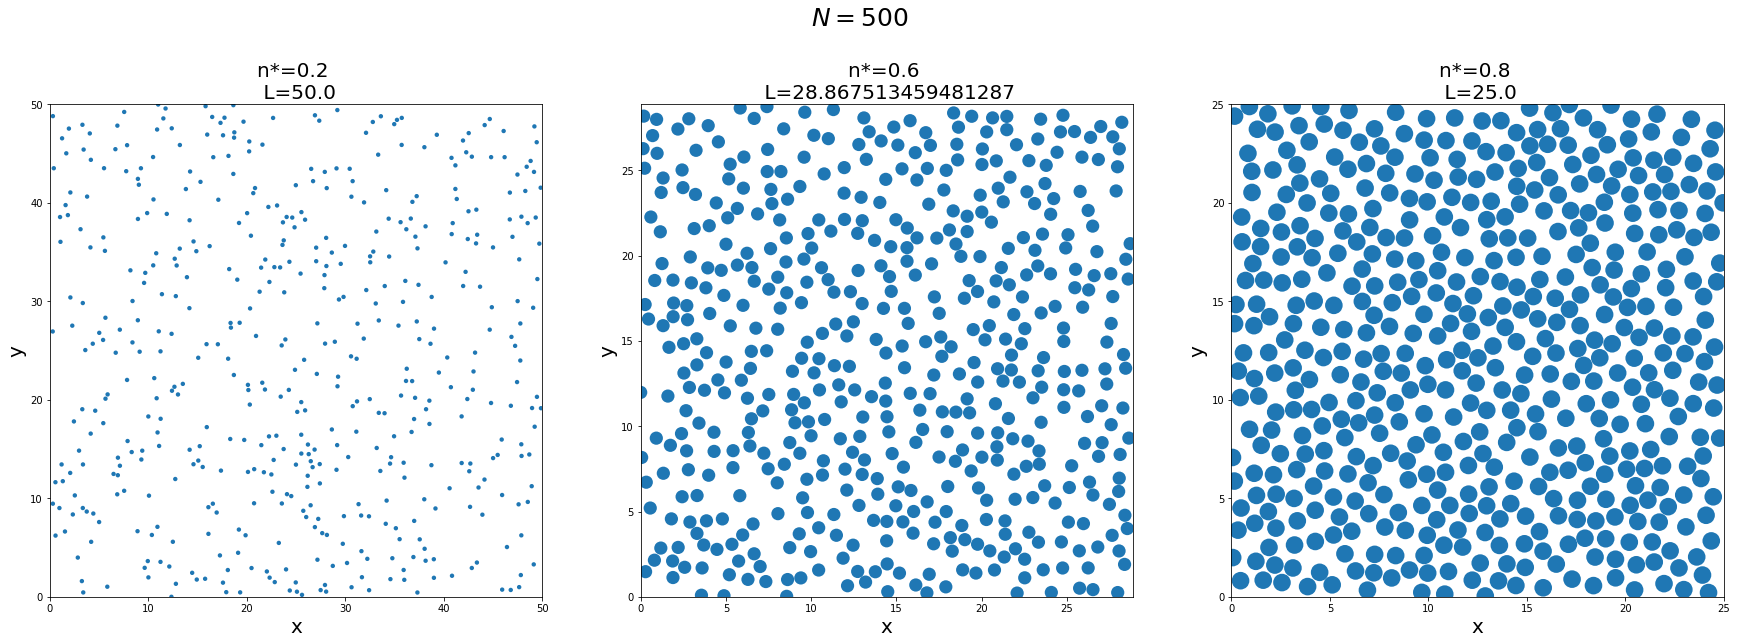

In [19]:
#Se graficaran las funciones obtenidas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(30, 10)

fig.suptitle("$N=500$", size=25)

ax1.set_aspect( 1 )
for i in range(500):
    ax1.add_artist( circl(n02,0.2,500,2,i) ) 
    
ax1.set_title("n*=0.2 \n L="+str(L_bi(0.2,500,2)), size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_xlim(0,L_bi(0.2,500,2))
ax1.set_ylim(0,L_bi(0.2,500,2))

ax2.set_aspect( 1 )
for i in range(500):
    ax2.add_artist( circl(n06,0.6,500,2,i) ) 
    
ax2.set_title("n*=0.6 \n L="+str(L_bi(0.6,500,2)), size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_xlim(0,L_bi(0.6,500,2))
ax2.set_ylim(0,L_bi(0.6,500,2))

ax3.set_aspect( 1 )
for i in range(500):
    ax3.add_artist( circl(n08,0.8,500,2,i) ) 
    
ax3.set_title("n*=0.8 \n L="+str(L_bi(0.8,500,2)), size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_xlim(0,L_bi(0.8,500,2))
ax3.set_ylim(0,L_bi(0.8,500,2))



plt.show()

<h3>Actividad 4</h3>
Configuración inicial aleatoria tridimensional

Modificar la Actividad 3 para construir configuraciones iniciales aleatorias tridimensionales sin translapes. Puede utilizar los mismos valores de los parámetros.

Las funciones creadas para la Actividad 2 estan escirtas en general solo es necesario cambiar el valor del parámetro con la información de la dimensión.

$dim=3$

a) Gráficos para concentración reducida fija en $n*=0.4$ y $N=100, 500, 1000$ y $dim=3$.

In [20]:
#Valores para n*=0.4
#con N=100
d100 = pd.DataFrame( caja(3,0.4,100,3) , columns={"x", "y", "z"})
#con N=500
d500 = pd.DataFrame( caja(3,0.4,500,3) , columns={"x", "y", "z"})
#con N=1000
d1000 = pd.DataFrame( caja(3,0.4,1000,3) , columns={"x", "y", "z"})

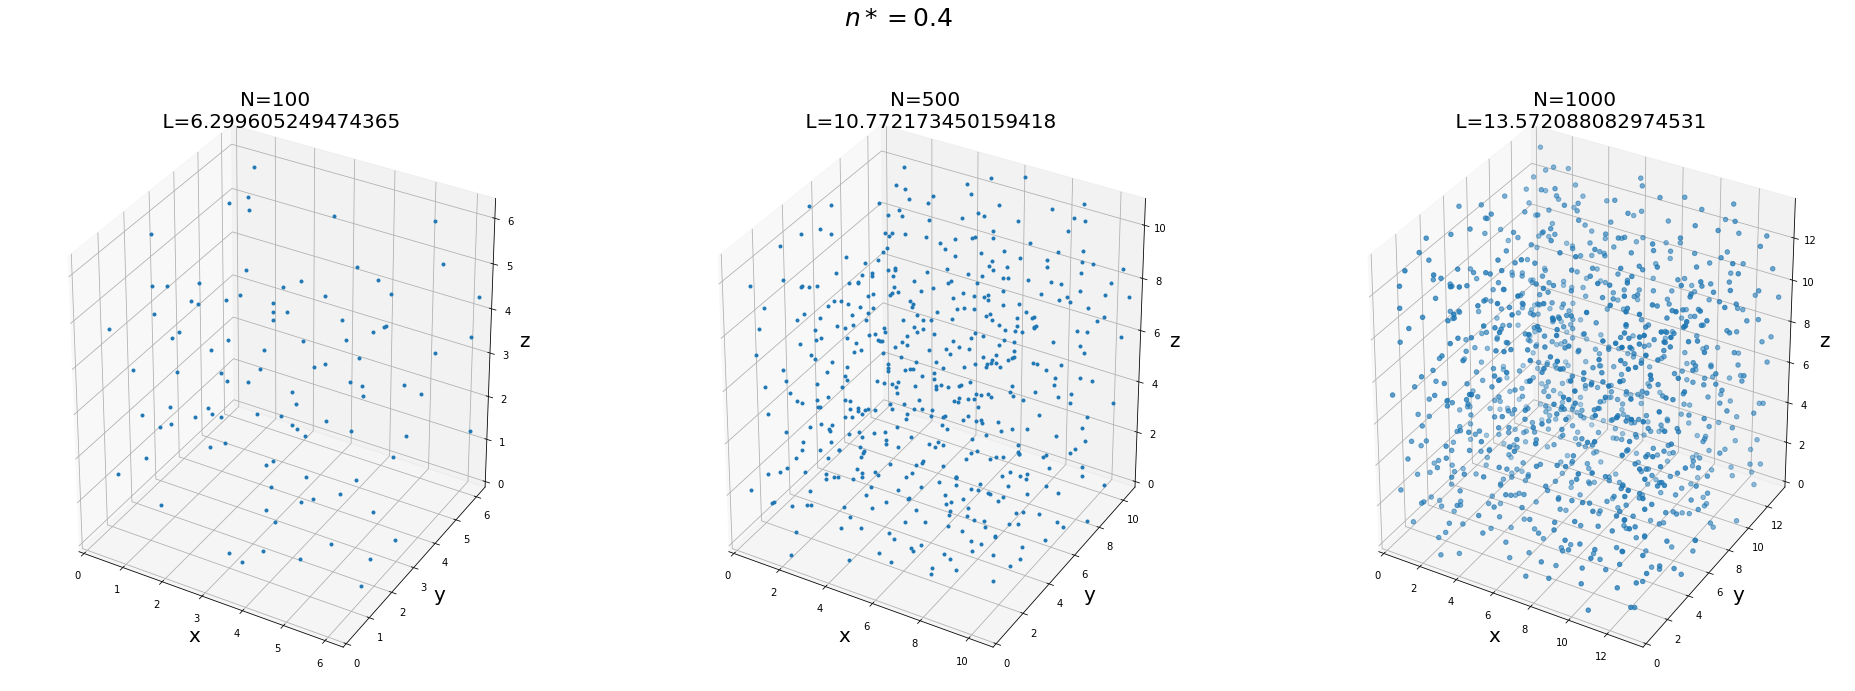

In [21]:
#Se graficaran las funciones obtenidas
fig = plt.figure()
fig.set_size_inches(33, 11)

fig.suptitle("$n*=0.4$", size=25)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.plot(d100["x"], d100["y"], d100["z"], ".")
ax1.set_title("N=100 \n L="+str(L_bi(0.4,100,3)), size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(0,L_bi(0.4,100,3))
ax1.set_ylim(0,L_bi(0.4,100,3))
ax1.set_zlim(0,L_bi(0.4,100,3))


ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.plot(d500["x"], d500["y"], d500["z"], ".")
ax2.set_title("N=500 \n L="+str(L_bi(0.4,500,3)), size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(0,L_bi(0.4,500,3))
ax2.set_ylim(0,L_bi(0.4,500,3))
ax2.set_zlim(0,L_bi(0.4,500,3))

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.scatter(d1000["x"], d1000["y"], d1000["z"], s=20)
ax3.set_title("N=1000 \n L="+str(L_bi(0.4,1000,3)), size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(0,L_bi(0.4,1000,3))
ax3.set_ylim(0,L_bi(0.4,1000,3))
ax3.set_zlim(0,L_bi(0.4,1000,3))

plt.show()

b) Gráficas para número de partículas fijo en $N=500$, $n*= 0.2,0.6,0.8$ y $dim=3$.

In [22]:
#Valores para N=500
#con n*=0.2
d02 = pd.DataFrame( caja(3,0.2,500,3) , columns={"x", "y", "z"})
#con n*=0.6
d06 = pd.DataFrame( caja(3,0.6,500,3) , columns={"x", "y", "z"})
#con n*=0.8
d08 = pd.DataFrame( caja(3,0.8,500,3) , columns={"x", "y", "z"})

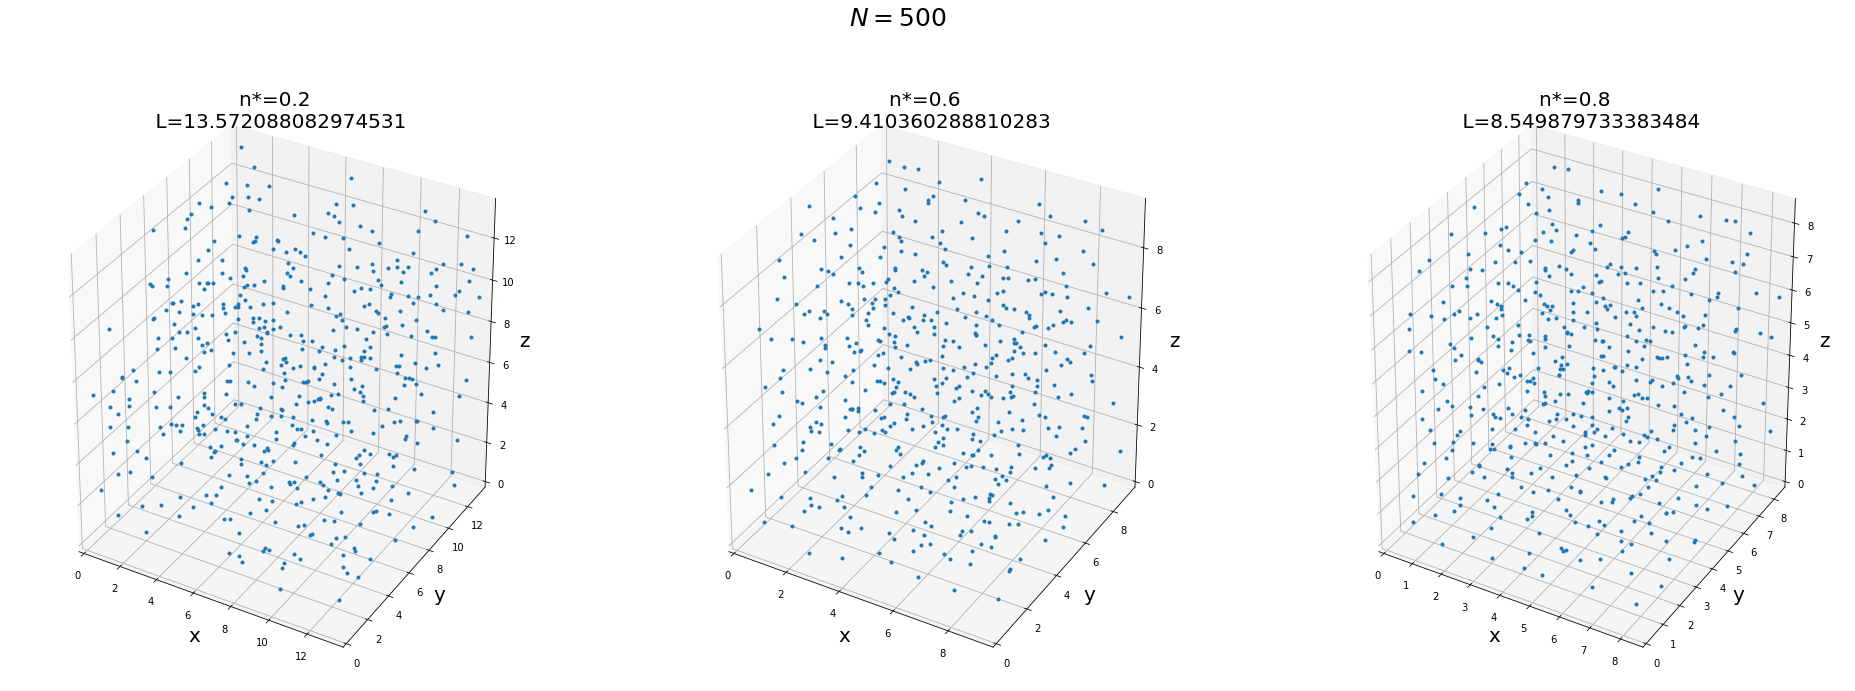

In [23]:
#Se graficaran las funciones obtenidas
fig = plt.figure()
fig.set_size_inches(33, 11)

fig.suptitle("$N=500$", size=25)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.plot(d02["x"], d02["y"], d02["z"], ".")
ax1.set_title("n*=0.2 \n L="+str(L_bi(0.2,500,3)), size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(0,L_bi(0.2,500,3))
ax1.set_ylim(0,L_bi(0.2,500,3))
ax1.set_zlim(0,L_bi(0.2,500,3))


ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.plot(d06["x"], d06["y"], d06["z"], ".")
ax2.set_title("n*=0.6 \n L="+str(L_bi(0.6,500,3)), size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(0,L_bi(0.6,500,3))
ax2.set_ylim(0,L_bi(0.6,500,3))
ax2.set_zlim(0,L_bi(0.6,500,3))

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.plot(d08["x"], d08["y"], d08["z"], ".")
ax3.set_title("n*=0.8 \n L="+str(L_bi(0.8,500,3)), size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(0,L_bi(0.8,500,3))
ax3.set_ylim(0,L_bi(0.8,500,3))
ax3.set_zlim(0,L_bi(0.8,500,3))

plt.show()